This notebook aims to compare the effect of different color spaces on image classification. Here, 

* RGB
* LUV
* LAB
* HSV
* YUV
* YCrCb and 
* HLS 

were compared. 
Here  norm_image = (image - mean) / std was used for normalization

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import zipfile
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(42) 
tf.config.experimental.enable_op_determinism()

## Load Data

In [2]:
# Replace the following with your secrets
os.environ['KAGGLE_USERNAME'] =  'oluwaseunilori'
os.environ['KAGGLE_KEY'] = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
import kaggle
!kaggle datasets download -d gpiosenka/butterfly-images40-species -p DATA_DIR

train_dir = "/content/train/"
test_dir ='/content/test'
val_dir = '/content/valid/'

 94% 342M/365M [00:01<00:00, 247MB/s]
100% 365M/365M [00:01<00:00, 238MB/s]


In [3]:
!unzip -q /content/DATA_DIR/butterfly-images40-species.zip

In [4]:
def normalize_img(image):
    mean, std = image.mean(), image.std()
    norm_image = (image - mean) / std
    return norm_image

## RGB

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


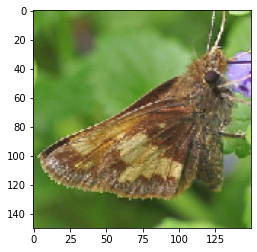

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)


plt.imshow(train_generator[1][0][0])

In [6]:
np.random.seed(42)
tf.random.set_seed(42)
initializer = tf.keras.initializers.GlorotUniform(seed=42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax') 
])

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb_history = model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
rgb_test = model.evaluate(test_generator)
print(rgb_test)

Epoch 1/5
291/291 [==============================] - 54s 147ms/step - loss: 4.3383 - acc: 0.0140 - val_loss: 4.2647 - val_acc: 0.0267
Epoch 2/5
291/291 [==============================] - 43s 148ms/step - loss: 4.1967 - acc: 0.0326 - val_loss: 4.1611 - val_acc: 0.0507
Epoch 3/5
291/291 [==============================] - 43s 146ms/step - loss: 4.0622 - acc: 0.0553 - val_loss: 4.0595 - val_acc: 0.0640
Epoch 4/5
291/291 [==============================] - 42s 145ms/step - loss: 3.9405 - acc: 0.0715 - val_loss: 3.9564 - val_acc: 0.0693
Epoch 5/5
12/12 [==============================] - 1s 80ms/step - loss: 3.7816 - acc: 0.1013
[3.781573534011841, 0.10133333504199982]


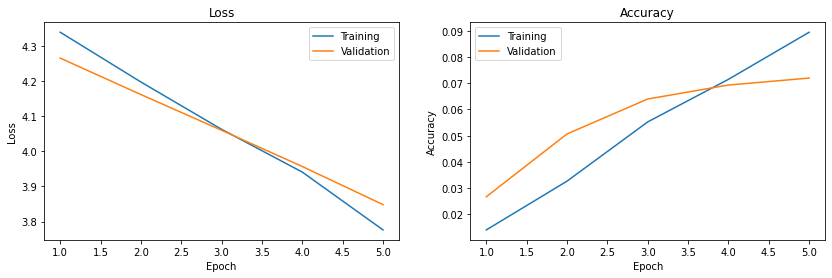

In [7]:
history = rgb_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB Norm

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


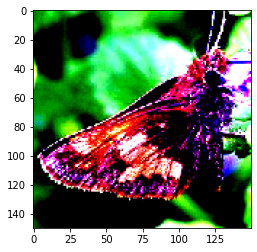

In [8]:
def conv_img(image):
    x,y,z =cv2.split(image)
    x = normalize_img(x)
    y = normalize_img(y)
    z = normalize_img(z)
    image = cv2.merge((x,y,z))
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)


plt.imshow(train_generator[1][0][0])

In [9]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

rgb_norm_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax') 
])

rgb_norm_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb_norm_history = rgb_norm_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
rgb_norm_test = rgb_norm_model.evaluate(test_generator)
print(rgb_norm_test)

Epoch 1/5
291/291 [==============================] - 49s 168ms/step - loss: 4.5283 - acc: 0.0173 - val_loss: 4.3175 - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 49s 167ms/step - loss: 4.3053 - acc: 0.0223 - val_loss: 4.2834 - val_acc: 0.0187
Epoch 3/5
291/291 [==============================] - 49s 168ms/step - loss: 4.2640 - acc: 0.0289 - val_loss: 4.2451 - val_acc: 0.0267
Epoch 4/5
291/291 [==============================] - 49s 169ms/step - loss: 4.1836 - acc: 0.0379 - val_loss: 4.1973 - val_acc: 0.0400
Epoch 5/5
12/12 [==============================] - 1s 100ms/step - loss: 4.0527 - acc: 0.0800
[4.052749156951904, 0.07999999821186066]


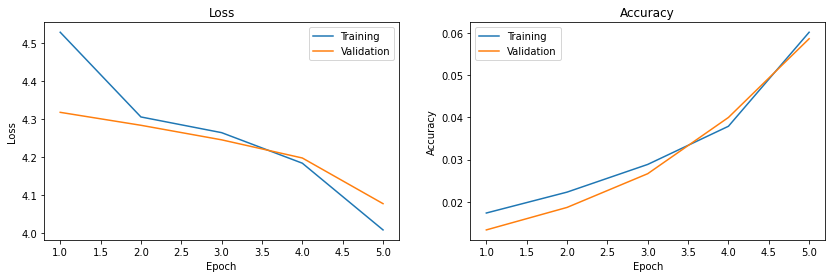

In [10]:
history = rgb_norm_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 LUV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


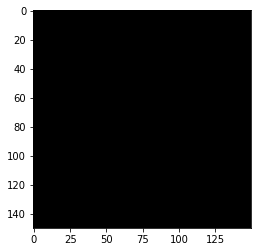

In [11]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
    x,y,z =cv2.split(image)
    x = normalize_img(x)
    y = normalize_img(y)
    z = normalize_img(z)
    image = cv2.merge((x,y,z))
    return image

train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [12]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

rgb2luv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2luv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2luv_history = rgb2luv_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
luv_test = rgb2luv_model.evaluate(test_generator)
print(luv_test)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


291/291 [==============================] - 52s 176ms/step - loss: nan - acc: 0.0137 - val_loss: nan - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 52s 179ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 3/5
291/291 [==============================] - 51s 174ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 4/5
291/291 [==============================] - 50s 173ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 5/5
12/12 [==============================] - 1s 112ms/step - loss: nan - acc: 0.0133
[nan, 0.013333333656191826]


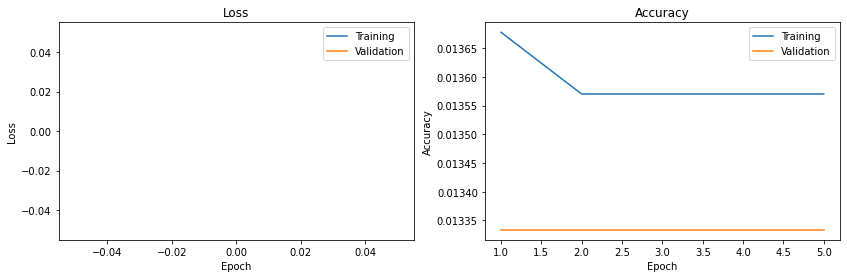

In [13]:
history = rgb2luv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 LAB

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


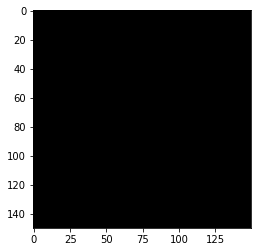

In [14]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    x,y,z =cv2.split(image)
    x = normalize_img(x)
    y = normalize_img(y)
    z = normalize_img(z)
    image = cv2.merge((x,y,z))
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)

validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [15]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

rgb2lab_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2lab_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2lab_history = rgb2lab_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
lab_test=rgb2lab_model.evaluate(test_generator)
print(lab_test)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


291/291 [==============================] - 51s 173ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 49s 169ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 3/5
291/291 [==============================] - 50s 172ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 4/5
291/291 [==============================] - 51s 176ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 5/5
12/12 [==============================] - 1s 107ms/step - loss: nan - acc: 0.0133
[nan, 0.013333333656191826]


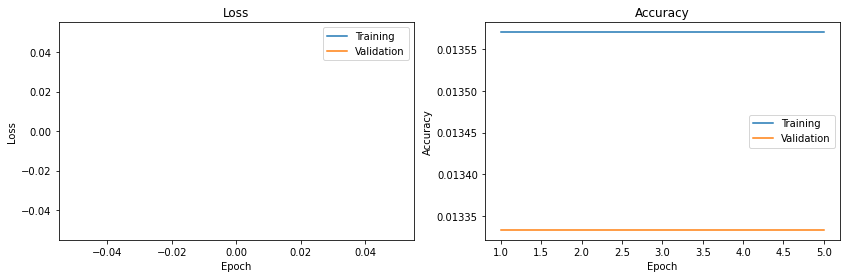

In [16]:
history = rgb2lab_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 HSV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


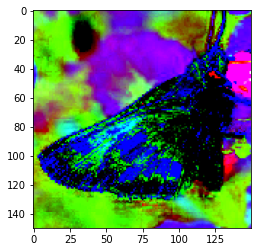

In [17]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    x,y,z =cv2.split(image)
    x = normalize_img(x)
    y = normalize_img(y)
    z = normalize_img(z)
    image = cv2.merge((x,y,z))
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
plt.imshow(train_generator[1][0][0])

In [18]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

rgb2hsv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2hsv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2hsv_history = rgb2hsv_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
hsv_test = rgb2hsv_model.evaluate(test_generator)
print(hsv_test)

Epoch 1/5
291/291 [==============================] - 50s 170ms/step - loss: 4.3866 - acc: 0.0286 - val_loss: 4.2529 - val_acc: 0.0267
Epoch 2/5
291/291 [==============================] - 50s 172ms/step - loss: 4.1687 - acc: 0.0454 - val_loss: 4.2579 - val_acc: 0.0400
Epoch 3/5
291/291 [==============================] - 50s 171ms/step - loss: 4.0479 - acc: 0.0554 - val_loss: 4.1379 - val_acc: 0.0453
Epoch 4/5
291/291 [==============================] - 50s 173ms/step - loss: 3.8754 - acc: 0.0764 - val_loss: 4.0249 - val_acc: 0.0720
Epoch 5/5
12/12 [==============================] - 1s 102ms/step - loss: 3.7966 - acc: 0.1013
[3.7966296672821045, 0.10133333504199982]


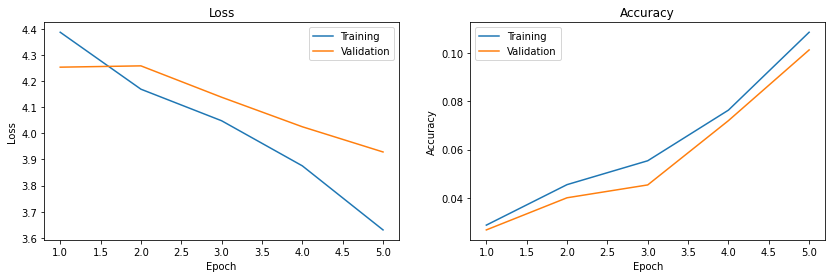

In [19]:
history = rgb2hsv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 YUV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


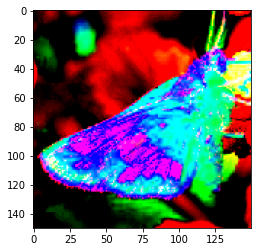

In [20]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    x,y,z =cv2.split(image)
    x = normalize_img(x)
    y = normalize_img(y)
    z = normalize_img(z)
    image = cv2.merge((x,y,z))
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
plt.imshow(train_generator[1][0][0])

In [21]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

rgb2yuv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2yuv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2yuv_history = rgb2yuv_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
yuv_test = rgb2yuv_model.evaluate(test_generator)
print(yuv_test)

Epoch 1/5
291/291 [==============================] - 50s 170ms/step - loss: 4.3869 - acc: 0.0325 - val_loss: 4.1317 - val_acc: 0.0640
Epoch 2/5
291/291 [==============================] - 49s 169ms/step - loss: 4.0034 - acc: 0.0731 - val_loss: 3.9847 - val_acc: 0.0640
Epoch 3/5
291/291 [==============================] - 50s 170ms/step - loss: 3.6513 - acc: 0.1355 - val_loss: 3.8934 - val_acc: 0.1333
Epoch 4/5
291/291 [==============================] - 49s 168ms/step - loss: 3.1869 - acc: 0.2279 - val_loss: 3.3599 - val_acc: 0.2213
Epoch 5/5
12/12 [==============================] - 1s 103ms/step - loss: 3.2295 - acc: 0.2213
[3.2294912338256836, 0.2213333398103714]


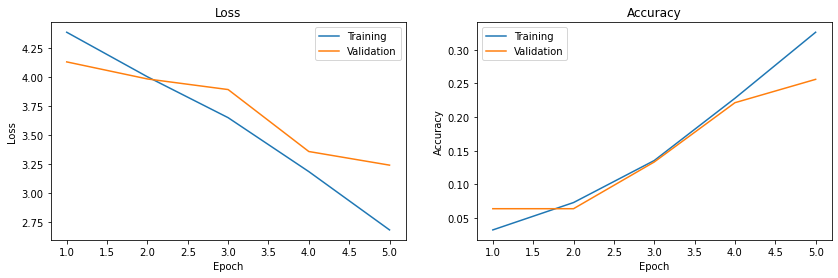

In [22]:
history = rgb2yuv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 YCrCb

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


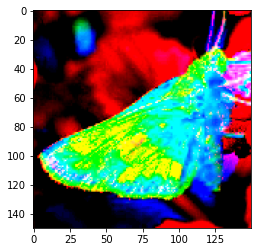

In [23]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    x,y,z =cv2.split(image)
    x = normalize_img(x)
    y = normalize_img(y)
    z = normalize_img(z)
    image = cv2.merge((x,y,z))
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [24]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

rgb2ycrcb_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2ycrcb_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2ycrcb_history = rgb2ycrcb_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
ycrcb_test = rgb2ycrcb_model.evaluate(test_generator)
print(ycrcb_test)

Epoch 1/5
291/291 [==============================] - 51s 174ms/step - loss: 4.3823 - acc: 0.0376 - val_loss: 4.1512 - val_acc: 0.0533
Epoch 2/5
291/291 [==============================] - 49s 169ms/step - loss: 3.9996 - acc: 0.0639 - val_loss: 4.0611 - val_acc: 0.0800
Epoch 3/5
291/291 [==============================] - 50s 171ms/step - loss: 3.7914 - acc: 0.1011 - val_loss: 3.8271 - val_acc: 0.1040
Epoch 4/5
291/291 [==============================] - 50s 170ms/step - loss: 3.4963 - acc: 0.1467 - val_loss: 3.7459 - val_acc: 0.1440
Epoch 5/5
12/12 [==============================] - 1s 100ms/step - loss: 3.5264 - acc: 0.1947
[3.526437282562256, 0.19466666877269745]


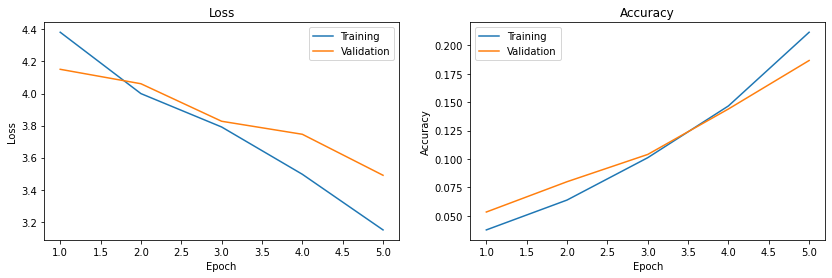

In [25]:
history = rgb2ycrcb_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 HLS

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


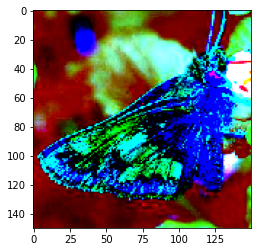

In [26]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    x,y,z =cv2.split(image)
    x = normalize_img(x)
    y = normalize_img(y)
    z = normalize_img(z)
    image = cv2.merge((x,y,z))
    return image
train_datagen = ImageDataGenerator(preprocessing_function=conv_img)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [27]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)

rgb2hls_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation='relu',kernel_initializer=initializer,input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='relu'), 
    tf.keras.layers.Dense(75, kernel_initializer=initializer,activation='softmax') 
])

rgb2hls_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2hls_history = rgb2hls_model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)
hls_test = rgb2hls_model.evaluate(test_generator)
print(hls_test)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


291/291 [==============================] - 49s 167ms/step - loss: nan - acc: 0.0135 - val_loss: nan - val_acc: 0.0133
Epoch 2/5
291/291 [==============================] - 48s 166ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 3/5
291/291 [==============================] - 48s 165ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 4/5
291/291 [==============================] - 48s 164ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0133
Epoch 5/5
12/12 [==============================] - 1s 100ms/step - loss: nan - acc: 0.0133
[nan, 0.013333333656191826]


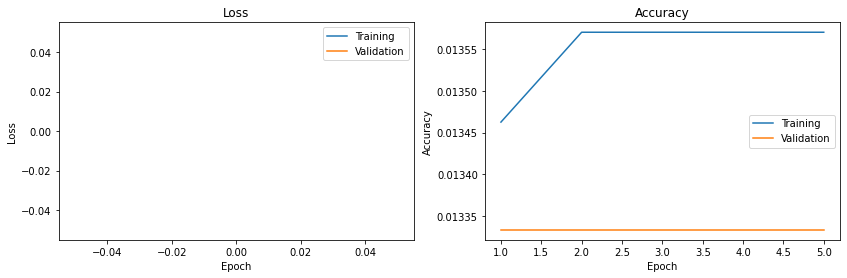

In [28]:
history = rgb2hls_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()

## Results

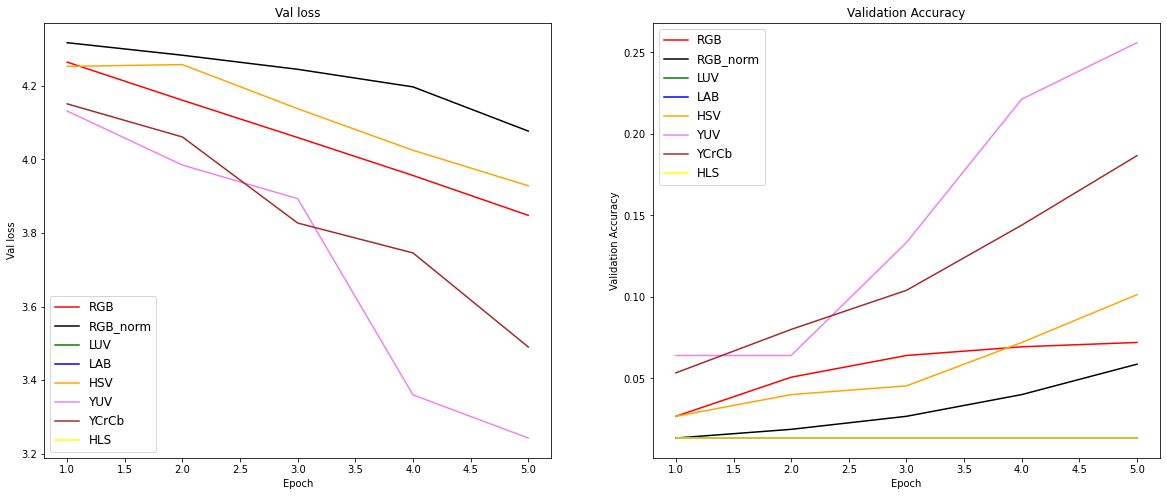

In [29]:
plot_rgb_history = rgb_history.history
plot_rgb_norm_history = rgb_norm_history.history

plot_rgb2luv_history = rgb2luv_history.history
plot_rgb2lab_history = rgb2lab_history.history
plot_rgb2hsvhistory = rgb2hsv_history.history
plot_rgb2yuv_history = rgb2yuv_history.history
plot_rgb2ycrcb_history = rgb2ycrcb_history.history
plot_rgb2hls_history = rgb2hls_history.history

n_epochs = len(history['loss'])

plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1),plot_rgb_history['val_loss'], label='RGB',color='red')
plt.plot(range(1, n_epochs+1),plot_rgb_norm_history['val_loss'], label='RGB_norm',color='black')
plt.plot(range(1, n_epochs+1),plot_rgb2luv_history['val_loss'], label='LUV',color='Green')
plt.plot(range(1, n_epochs+1),plot_rgb2lab_history['val_loss'], label='LAB',color='blue')
plt.plot(range(1, n_epochs+1),plot_rgb2hsvhistory['val_loss'], label='HSV',color='orange')
plt.plot(range(1, n_epochs+1),plot_rgb2yuv_history['val_loss'], label='YUV',color='violet')
plt.plot(range(1, n_epochs+1),plot_rgb2ycrcb_history['val_loss'], label='YCrCb',color='brown')
plt.plot(range(1, n_epochs+1),plot_rgb2hls_history['val_loss'], label='HLS',color='yellow')
plt.xlabel('Epoch'); plt.ylabel('Val loss'); plt.title('Val loss')
plt.legend(fontsize=12)
plt.subplot(1,2,2)



plt.plot(range(1, n_epochs+1),plot_rgb_history['val_acc'], label='RGB',color='Red')
plt.plot(range(1, n_epochs+1),plot_rgb_norm_history['val_acc'], label='RGB_norm',color='black')
plt.plot(range(1, n_epochs+1),plot_rgb2luv_history['val_acc'], label='LUV',color='Green')
plt.plot(range(1, n_epochs+1),plot_rgb2lab_history['val_acc'], label='LAB',color='Blue')
plt.plot(range(1, n_epochs+1),plot_rgb2hsvhistory['val_acc'], label='HSV',color='orange')
plt.plot(range(1, n_epochs+1),plot_rgb2yuv_history['val_acc'], label='YUV',color='violet')
plt.plot(range(1, n_epochs+1),plot_rgb2ycrcb_history['val_acc'], label='YCrCb',color='brown')
plt.plot(range(1, n_epochs+1),plot_rgb2hls_history['val_acc'], label='HLS',color='yellow')
plt.xlabel('Epoch'); plt.ylabel('Validation Accuracy'); plt.title('Validation Accuracy')
plt.legend(fontsize=12)
plt.show()
